<font size="+1">VP Data <i>in-silico</i> Method Goodness of Fit</font> <br><br>
Ok here we are going to apply MCMC and a Bayesian regression to a practical example: interpreting physical-chemical data for the VP paper. My goal here is to determine a linear model for fitting each of the <i>in-silico</i>  estimation methods to the GC-RT data and see if there are any outliers. Outliers in this case would represent compounds for which the <i>in-silico</i> method does not provide a good fit to the GC-RT data

In [2]:
#First, lets read in the data. Need to import some packages:
import pandas as pd
import numpy as np

df = pd.read_excel('VP_KOA_Data.xlsx')
LDVs = pd.read_excel('LDV_Data.xlsx')
LDVs.head()

,Class,Order,Compound Name,CAS No.,∆VAPH/kJ·mol-1,∆VAPH SD,∆WH/kJ·mol-1,∆WH SD,∆OH/kJ·mol-1,∆OH SD,...,LogPL,LogPL SD,LogSWL,LogSWL SD,LogSOL,LogSOL SD,∆fusS,∆fusS SD,Tm,Tm SD
0,Musk,1,cyclopentadecanone,502-72-7,57.963874,14.656731,0,0,0,0,...,-0.271598,0.439382,-2.330725,0.233073,0.0,0.0,27.437164,2.025770,63.822222,3.033986
1,Musk,2,15-pentadecanolide,106-02-5,77.166667,2.608320,0,0,0,0,...,-1.044623,0.101883,-2.878339,0.287834,0.0,0.0,22.617124,2.261712,34.290000,1.636460
2,Musk,3,Musk Ambrette,83-66-9,79.500000,15.900000,0,0,0,0,...,-1.225735,0.191959,0.000000,0.000000,0.0,0.0,0.000000,0.000000,85.250000,0.500000
3,Musk,4,16-hexadecanolide,109-29-5,73.300000,9.761660,0,0,0,0,...,-1.118941,0.434816,-3.276768,0.327677,0.0,0.0,24.902975,2.490298,35.525000,0.742462
4,Musk,5,Celestolide,13171-00-1,0.000000,0.000000,0,0,0,0,...,-0.769530,0.076953,-1.339366,0.133937,0.0,0.0,0.000000,0.000000,78.000000,0.500000


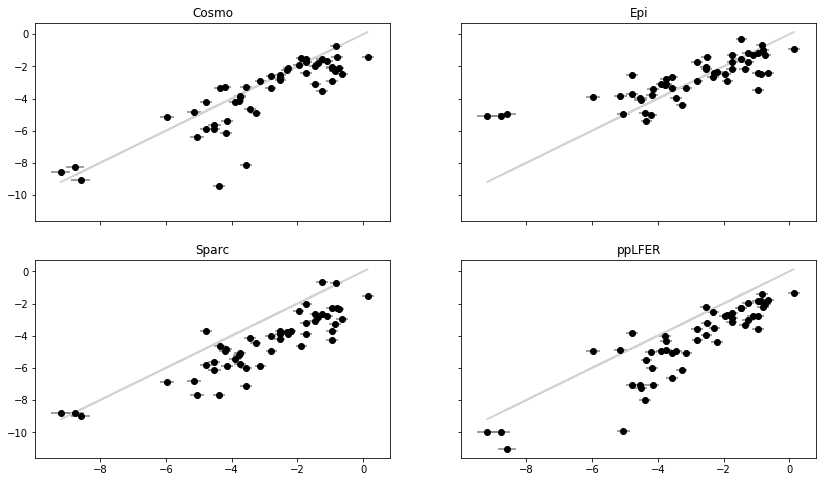

In [3]:
#Now lets put this into numpy. To make this simple I am going to make a 2D ndarray for each in silico method that
#will exclude nans on a casewise basis. Also plot the data for funsies
import matplotlib.pyplot as plt

logP = np.array(df.loc[:,'LogP (This Study)'])
cosmoP = np.array(df.loc[:,['LogP (This Study)','COSMO-P','logP error']].dropna(how = 'any'))
epiP = np.array(df.loc[:,['LogP (This Study)','EPISuite P','logP error']].dropna(how = 'any'))
sparcP = np.array(df.loc[:,['LogP (This Study)','SPARC P','logP error']].dropna(how = 'any'))
pplferP = np.array(df.loc[:,['LogP (This Study)','ppLFER P','logP error']].dropna(how = 'any'))

f, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey = True)
axes[0, 0].plot(cosmoP[:,0],cosmoP[:,0],'-',color = 'lightgrey')
axes[0, 0].errorbar(cosmoP[:,0],cosmoP[:,1],xerr = cosmoP[:,2],fmt = 'ko',ecolor = 'grey')
axes[0, 1].plot(cosmoP[:,0],cosmoP[:,0],'-',color = 'lightgrey')
axes[0, 1].errorbar(epiP[:,0],epiP[:,1],xerr = epiP[:,2],fmt = 'ko',ecolor = 'grey')
axes[1, 0].plot(cosmoP[:,0],cosmoP[:,0],'-',color = 'lightgrey')
axes[1, 0].errorbar(sparcP[:,0],sparcP[:,1],xerr = sparcP[:,2],fmt = 'ko',ecolor = 'grey')
axes[1, 1].plot(cosmoP[:,0],cosmoP[:,0],'-',color = 'lightgrey')
axes[1, 1].errorbar(pplferP[:,0],pplferP[:,1],xerr = pplferP[:,2],fmt = 'ko',ecolor = 'grey')
#Set Titles
axes[0, 0].set_title('Cosmo')
axes[0, 1].set_title('Epi')
axes[1, 0].set_title('Sparc')
axes[1, 1].set_title('ppLFER');

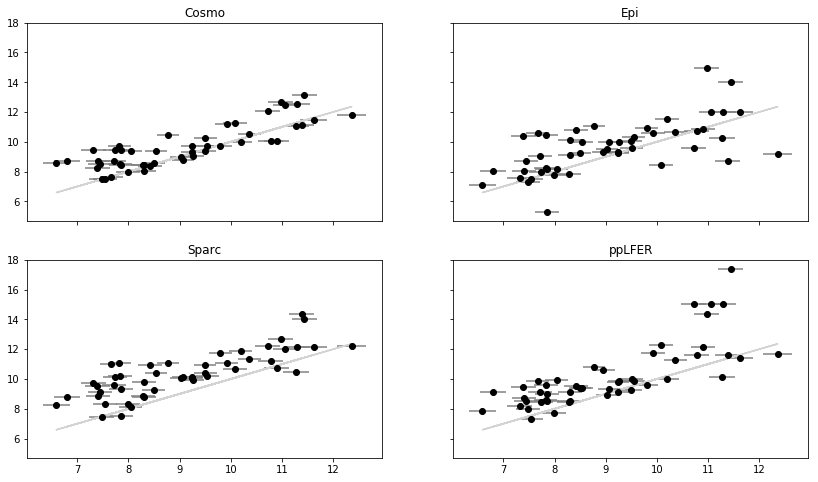

In [4]:
logKoa = np.array(df.loc[:,'Log KOA (this study)'])
cosmoKoa = np.array(df.loc[:,['Log KOA (this study)','COSMO-RS Koa','Koa error']].dropna(how = 'any'))
epiKoa = np.array(df.loc[:,['Log KOA (this study)','EPI Suite Koa','Koa error']].dropna(how = 'any'))
sparcKoa = np.array(df.loc[:,['Log KOA (this study)','SPARC Koa','Koa error']].dropna(how = 'any'))
pplferKoa = np.array(df.loc[:,['Log KOA (this study)','pp-LFER Koa','Koa error']].dropna(how = 'any'))

f, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey = True)
axes[0, 0].plot(cosmoKoa[:,0],cosmoKoa[:,0],'-',color = 'lightgrey')
axes[0, 0].errorbar(cosmoKoa[:,0],cosmoKoa[:,1],xerr = cosmoKoa[:,2],fmt = 'ko',ecolor = 'grey')
axes[0, 1].plot(cosmoKoa[:,0],cosmoKoa[:,0],'-',color = 'lightgrey')
axes[0, 1].errorbar(epiKoa[:,0],epiKoa[:,1],xerr = epiKoa[:,2],fmt = 'ko',ecolor = 'grey')
axes[1, 0].plot(cosmoKoa[:,0],cosmoKoa[:,0],'-',color = 'lightgrey')
axes[1, 0].errorbar(sparcKoa[:,0],sparcKoa[:,1],xerr = sparcKoa[:,2],fmt = 'ko',ecolor = 'grey')
axes[1, 1].plot(cosmoKoa[:,0],cosmoKoa[:,0],'-',color = 'lightgrey')
axes[1, 1].errorbar(pplferKoa[:,0],pplferKoa[:,1],xerr = pplferKoa[:,2],fmt = 'ko',ecolor = 'grey')
#Set Titles
axes[0, 0].set_title('Cosmo')
axes[0, 1].set_title('Epi')
axes[1, 0].set_title('Sparc')
axes[1, 1].set_title('ppLFER');

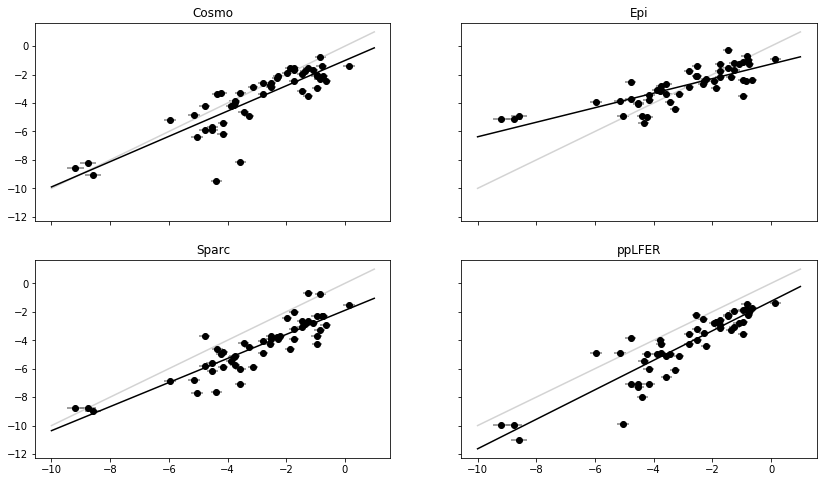

In [5]:
#Of course, just like in our example, we can do this whole thing with a least squares minimization
from scipy import optimize
#Define the objective function, in this case just simple least squares
def squared_loss(theta, x, y, e):
    dy = y - theta[0] - theta[1] * x
    return np.sum(0.5 * (dy) ** 2)

#Generate our regressions based on least squares for each QSAR
cosmoPtheta1 = optimize.fmin(squared_loss, [0, 0],args = (cosmoP[:,0],cosmoP[:,1],cosmoP[:,2]), disp=False)
epiPtheta1 = optimize.fmin(squared_loss, [0, 0],args = (epiP[:,0],epiP[:,1],epiP[:,2]), disp=False)
sparcPtheta1 = optimize.fmin(squared_loss, [0, 0],args = (sparcP[:,0],sparcP[:,1],sparcP[:,2]), disp=False)
pplferPtheta1 = optimize.fmin(squared_loss, [0, 0],args = (pplferP[:,0],pplferP[:,1],pplferP[:,2]), disp=False)
Pfit = np.linspace(-10,1)
#Now, lets plot them with the regression in black
f, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey = True)
#Cosmo
axes[0, 0].plot(Pfit,Pfit,'-',color = 'lightgrey')
axes[0, 0].plot(Pfit, cosmoPtheta1[0] + cosmoPtheta1[1] * Pfit, '-k')
axes[0, 0].errorbar(cosmoP[:,0],cosmoP[:,1],xerr = cosmoP[:,2],fmt = 'ko',ecolor = 'grey')
#Epi
axes[0, 1].plot(Pfit,Pfit,'-',color = 'lightgrey')
axes[0, 1].plot(Pfit, epiPtheta1[0] + epiPtheta1[1] * Pfit, '-k')
axes[0, 1].errorbar(epiP[:,0],epiP[:,1],xerr = epiP[:,2],fmt = 'ko',ecolor = 'grey')
#SPARC
axes[1, 0].plot(Pfit,Pfit,'-',color = 'lightgrey')
axes[1, 0].plot(Pfit, sparcPtheta1[0] + sparcPtheta1[1] * Pfit, '-k')
axes[1, 0].errorbar(sparcP[:,0],sparcP[:,1],xerr = sparcP[:,2],fmt = 'ko',ecolor = 'grey')
#ppLFER
axes[1, 1].plot(Pfit,Pfit,'-',color = 'lightgrey')
axes[1, 1].plot(Pfit, pplferPtheta1[0] + pplferPtheta1[1] * Pfit, '-k')
axes[1, 1].errorbar(pplferP[:,0],pplferP[:,1],xerr = pplferP[:,2],fmt = 'ko',ecolor = 'grey')
#Set Titles
axes[0, 0].set_title('Cosmo')
axes[0, 1].set_title('Epi')
axes[1, 0].set_title('Sparc')
axes[1, 1].set_title('ppLFER');

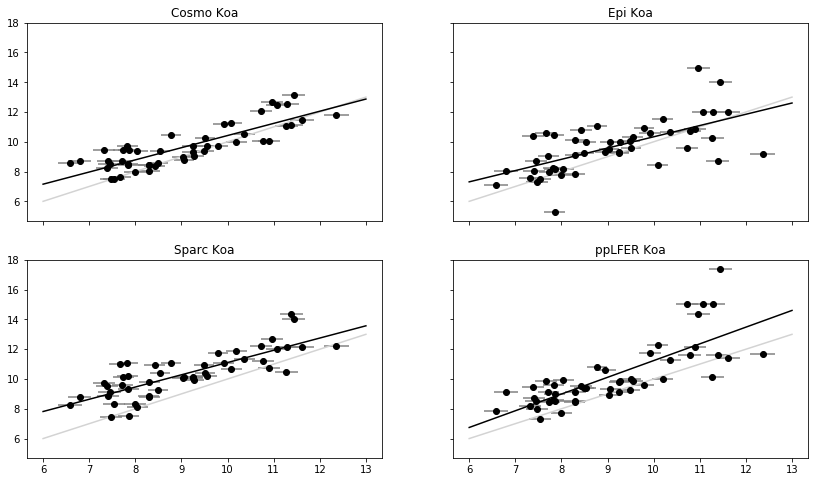

In [6]:
#Koas
cosmoKoatheta1 = optimize.fmin(squared_loss, [0, 0],args = (cosmoKoa[:,0],cosmoKoa[:,1],cosmoKoa[:,2]), disp=False)
epiKoatheta1 = optimize.fmin(squared_loss, [0, 0],args = (epiKoa[:,0],epiKoa[:,1],epiKoa[:,2]), disp=False)
sparcKoatheta1 = optimize.fmin(squared_loss, [0, 0],args = (sparcKoa[:,0],sparcKoa[:,1],sparcKoa[:,2]), disp=False)
pplferKoatheta1 = optimize.fmin(squared_loss, [0, 0],args = (pplferKoa[:,0],pplferKoa[:,1],pplferKoa[:,2]), disp=False)
Koafit = np.linspace(6,13)
#Now, lets plot them with the regression in black
f, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey = True)
#Cosmo
axes[0, 0].plot(Koafit,Koafit,'-',color = 'lightgrey')
axes[0, 0].plot(Koafit, cosmoKoatheta1[0] + cosmoKoatheta1[1] * Koafit, '-k')
axes[0, 0].errorbar(cosmoKoa[:,0],cosmoKoa[:,1],xerr = cosmoKoa[:,2],fmt = 'ko',ecolor = 'grey')
#Epi
axes[0, 1].plot(Koafit,Koafit,'-',color = 'lightgrey')
axes[0, 1].plot(Koafit, epiKoatheta1[0] + epiKoatheta1[1] * Koafit, '-k')
axes[0, 1].errorbar(epiKoa[:,0],epiKoa[:,1],xerr = epiKoa[:,2],fmt = 'ko',ecolor = 'grey')
#SPARC
axes[1, 0].plot(Koafit,Koafit,'-',color = 'lightgrey')
axes[1, 0].plot(Koafit, sparcKoatheta1[0] + sparcKoatheta1[1] * Koafit, '-k')
axes[1, 0].errorbar(sparcKoa[:,0],sparcKoa[:,1],xerr = sparcKoa[:,2],fmt = 'ko',ecolor = 'grey')
#ppLFER
axes[1, 1].plot(Koafit,Koafit,'-',color = 'lightgrey')
axes[1, 1].plot(Koafit, pplferKoatheta1[0] + pplferKoatheta1[1] * Koafit, '-k')
axes[1, 1].errorbar(pplferKoa[:,0],pplferKoa[:,1],xerr = pplferKoa[:,2],fmt = 'ko',ecolor = 'grey')
#Set Titles
axes[0, 0].set_title('Cosmo Koa')
axes[0, 1].set_title('Epi Koa')
axes[1, 0].set_title('Sparc Koa')
axes[1, 1].set_title('ppLFER Koa');

In [7]:
#So - that was the good old frequentist approach. Now we will try to do it Bayesian by
# introducing weights, gi, as nuisance variables.
# theta will be an array of length 2 + N, where N is the number of points
# theta[0] is the intercept, theta[1] is the slope,
# and theta[2 + i] is the weight g_i

#Flat prior
def log_prior(theta):
    #g_i needs to be between 0 and 1
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf  # recall log(0) = -inf

def log_likelihood(theta, x, y, e, sigma_B):
    dy = y - theta[0] - theta[1] * x
    g = np.clip(theta[2:], 0, 1)  # g<0 or g>1 leads to NaNs in logarithm
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
    return np.sum(np.logaddexp(logL1, logL2))

def log_posterior(theta, x, y, e, sigma_B):
    return log_prior(theta) + log_likelihood(theta, x, y, e, sigma_B)

In [8]:
#Then we set up the MCMC using emcee
#Define what data we will look at
data = epiP
theta = epiPtheta1
#Set parameters
ndim = 2 + len(data[:,0])  # number of parameters in the model
nwalkers = 2*ndim  # number of MCMC walkers
nburn = 10000  # "burn-in" period to let chains stabilize
nsteps = nburn+5000 # number of MCMC steps to take
sig_b = 100
# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data[:,0],data[:,1],data[:,2], sig_b])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


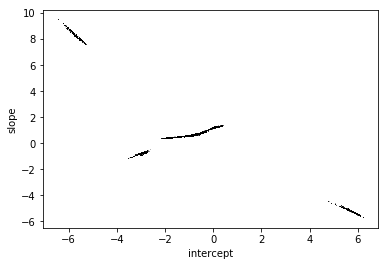

In [9]:
#Now did that give us anything useful?
#Because MCMC models the posterior distribution, we can just ignore the nuisance variables!
plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
ylim = [0.30,0.65]
xlim = [24,40]
plt.xlabel('intercept')
plt.ylabel('slope');
#plt.xlim = xlim
#plt.ylim = ylim

g1 mean: 0.58
g2 mean: 0.53


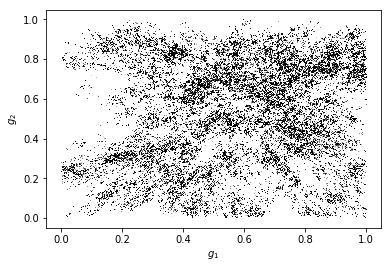

In [10]:
plt.plot(sample[:, 2], sample[:, 3], ',k', alpha=0.1)
plt.xlabel('$g_1$')
plt.ylabel('$g_2$')

print("g1 mean: {0:.2f}".format(sample[:, 2].mean()))
print("g2 mean: {0:.2f}".format(sample[:, 3].mean()))


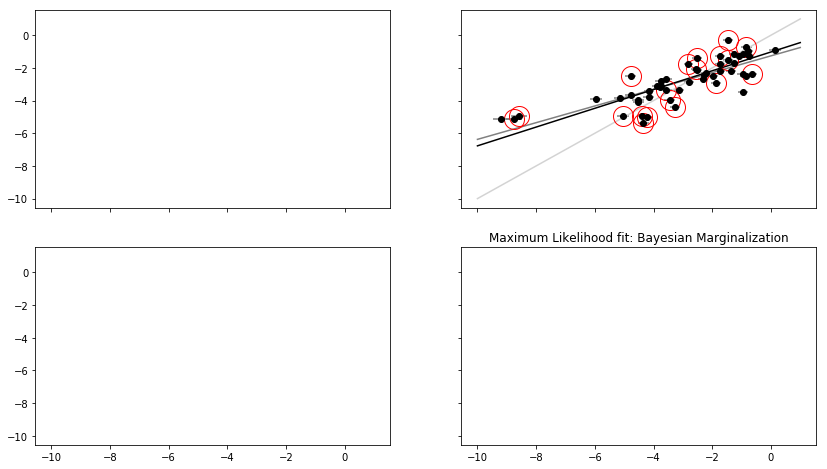

In [11]:
#And what about those outliers?
#Now lets plot what the fits look like for the actual data, using g < 0.5 as our cutoff
#We are highlighting the outliers in red circles, least squares in light gray, Huber in gray, emcee in black
theta2 = np.mean(sample[:, :2], 0)
g = np.mean(sample[:, 2:], 0)
outliers = (g < 0.5)

f, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey = True)
#Epi
axes[0, 1].plot(Pfit,Pfit,'-',color = 'lightgrey')
axes[0, 1].plot(Pfit, epiPtheta1[0] + epiPtheta1[1] * Pfit, 'gray')
axes[0, 1].plot(Pfit, theta2[0] + theta2[1] * Pfit, color='black')
axes[0, 1].errorbar(epiP[:,0],epiP[:,1],xerr = epiP[:,2],fmt = 'ko',ecolor = 'grey')

axes[0, 1].plot(epiP[outliers,0], epiP[outliers,1], 'ro', ms=20, mfc='none', mec='red')
plt.title('Maximum Likelihood fit: Bayesian Marginalization');

AttributeError: 'numpy.ndarray' object has no attribute 'name'